# Image denoising

### Singular value thresholding

In [1]:
import numpy as np
from scipy.stats import bernoulli
from utils import *
from svt_solver import *

import matplotlib.pyplot as plt
from skimage.metrics import structural_similarity as ssim
from PIL import Image
import cv2

In [2]:
img = Image.open('cameraman.png').convert('L')
img = np.asarray(img, dtype='float') #/255.

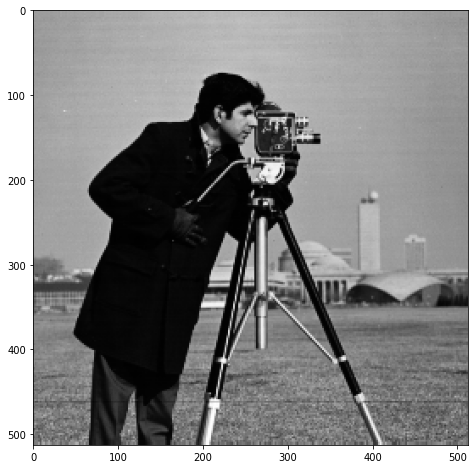

In [3]:
fig = plt.figure(figsize=[8,8])
plt.imshow(img, cmap='gray')
plt.show()

**Add noise**

In [4]:
def gen_mask(m, n, prob_masked=0.5):
    """
    Generate a binary mask for m x n matrix.
    Note that 1 denotes observed, and 0 denotes unobserved.
    """
    return 1 - bernoulli.rvs(p=prob_masked, size=(m, n))

<Figure size 1152x576 with 0 Axes>

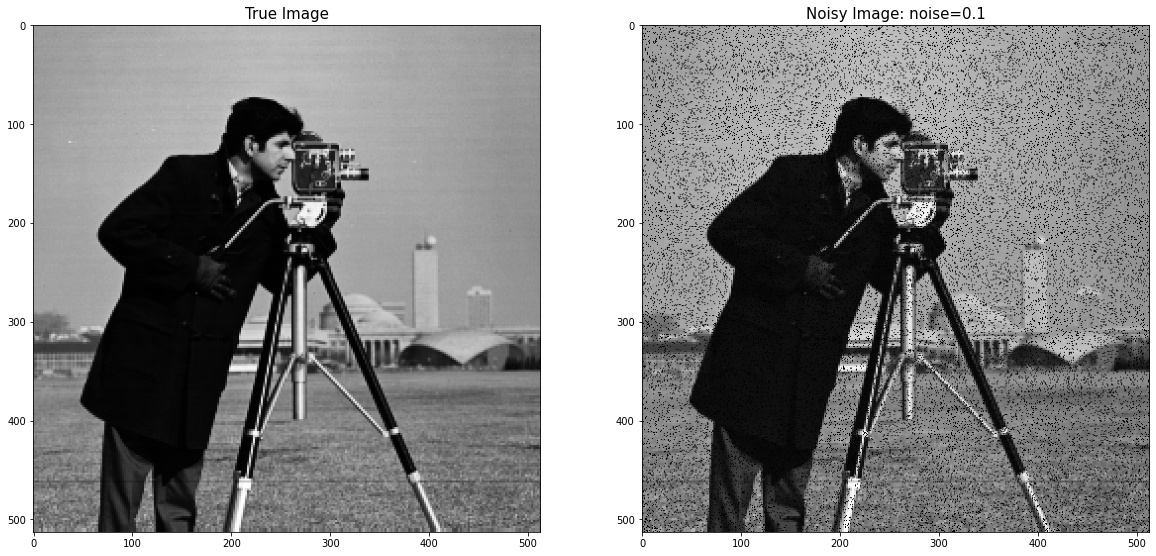

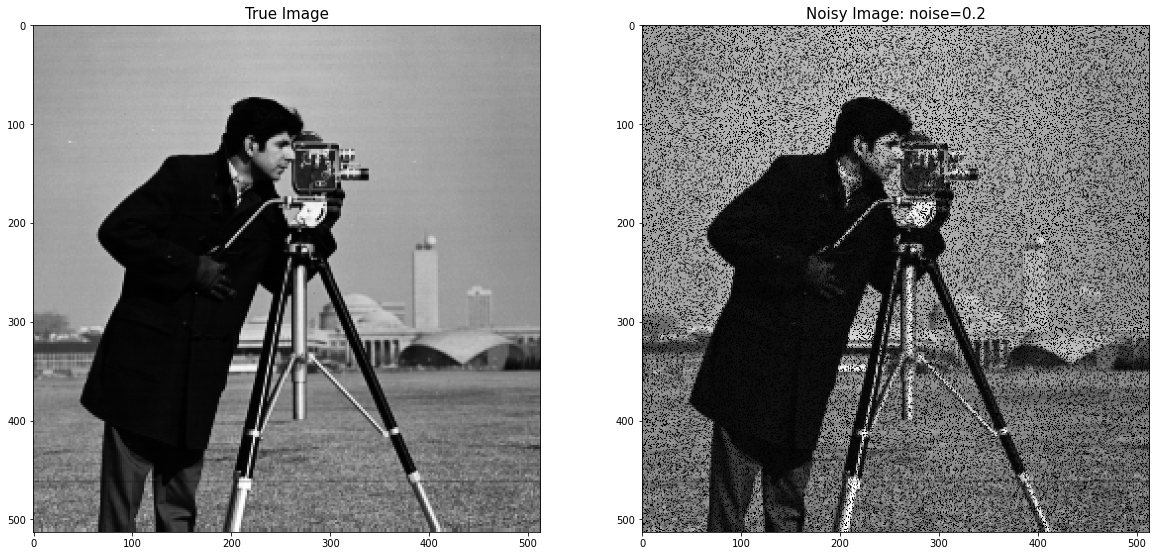

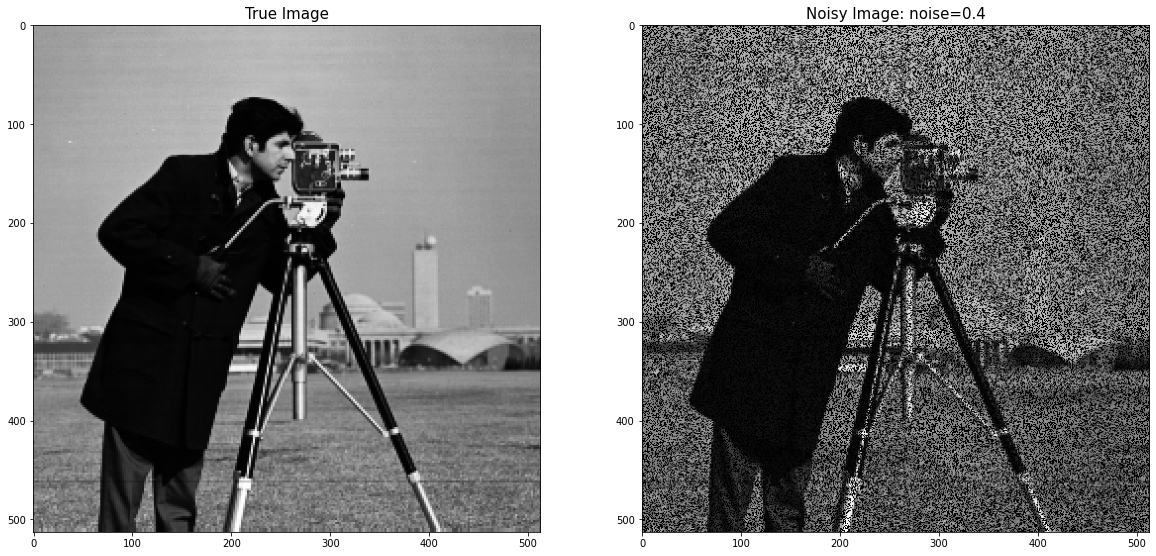

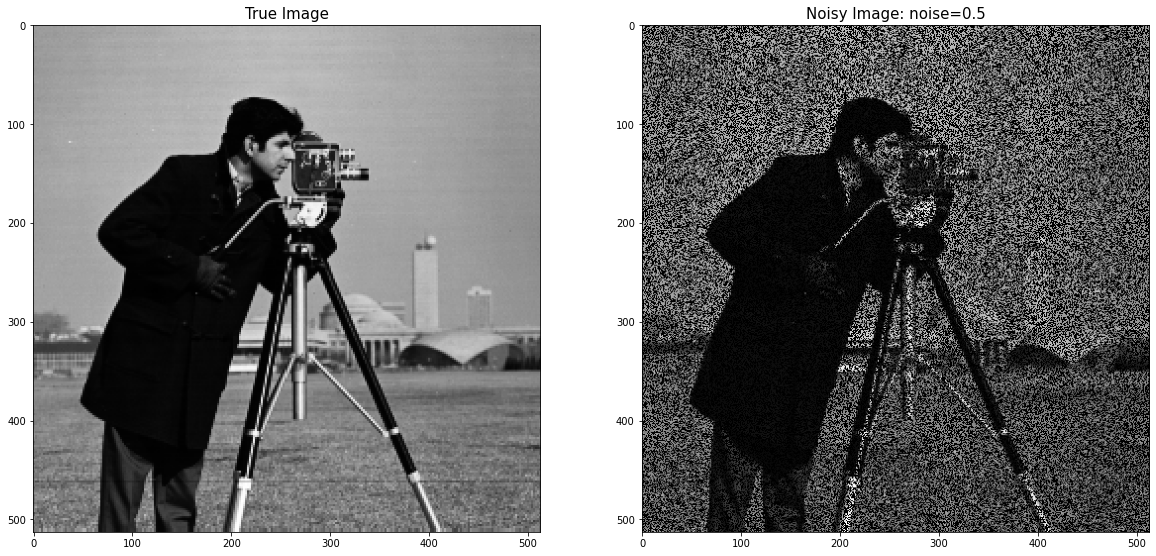

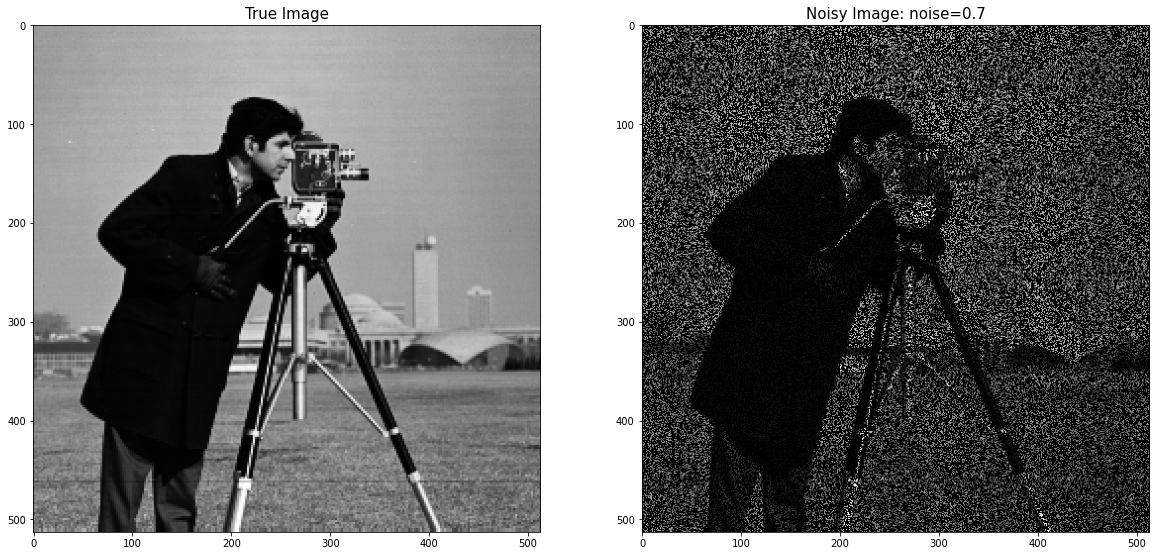

In [5]:
m, n = img.shape
noise_level = [0.1, 0.2, 0.4, 0.5, 0.7]

plt.figure(figsize=(16, 8))
for i, nl in enumerate(noise_level):
    mask = gen_mask(m, n, nl)
    img_noisy = img*mask
    plot_proc(img, img_noisy, 'Noisy Image: noise='+str(nl))


**Solve by svt**

SVT k 10, delta 0.2, noise level 0.1, RMSE:23.137 and SSIM: 0.185
SVT k 10, delta 0.2, noise level 0.2, RMSE:23.400 and SSIM: 0.185
SVT k 10, delta 0.2, noise level 0.4, RMSE:23.842 and SSIM: 0.171
SVT k 10, delta 0.2, noise level 0.5, RMSE:23.865 and SSIM: 0.170
SVT k 10, delta 0.2, noise level 0.7, RMSE:26.143 and SSIM: 0.130
SVT k 10, delta 0.5, noise level 0.1, RMSE:23.347 and SSIM: 0.188
SVT k 10, delta 0.5, noise level 0.2, RMSE:23.362 and SSIM: 0.184
SVT k 10, delta 0.5, noise level 0.4, RMSE:23.629 and SSIM: 0.176
SVT k 10, delta 0.5, noise level 0.5, RMSE:23.898 and SSIM: 0.169
SVT k 10, delta 0.5, noise level 0.7, RMSE:25.078 and SSIM: 0.150
SVT k 10, delta 1.5, noise level 0.1, RMSE:23.726 and SSIM: 0.183
SVT k 10, delta 1.5, noise level 0.2, RMSE:23.075 and SSIM: 0.178
SVT k 10, delta 1.5, noise level 0.4, RMSE:23.645 and SSIM: 0.173
SVT k 10, delta 1.5, noise level 0.5, RMSE:23.976 and SSIM: 0.169
SVT k 10, delta 1.5, noise level 0.7, RMSE:25.384 and SSIM: 0.146
SVT k 10, 

<Figure size 1440x720 with 0 Axes>

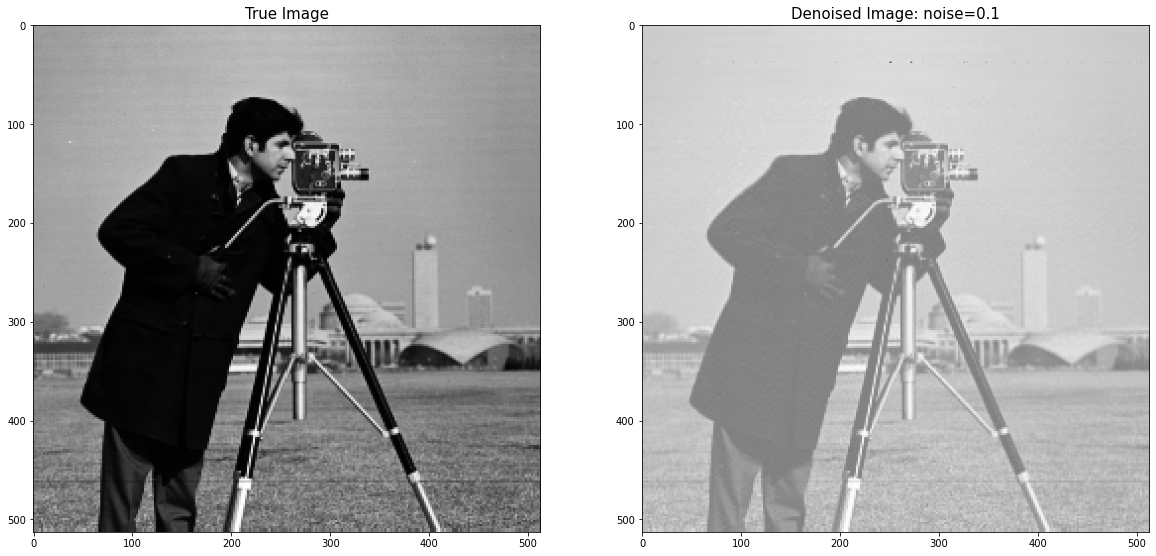

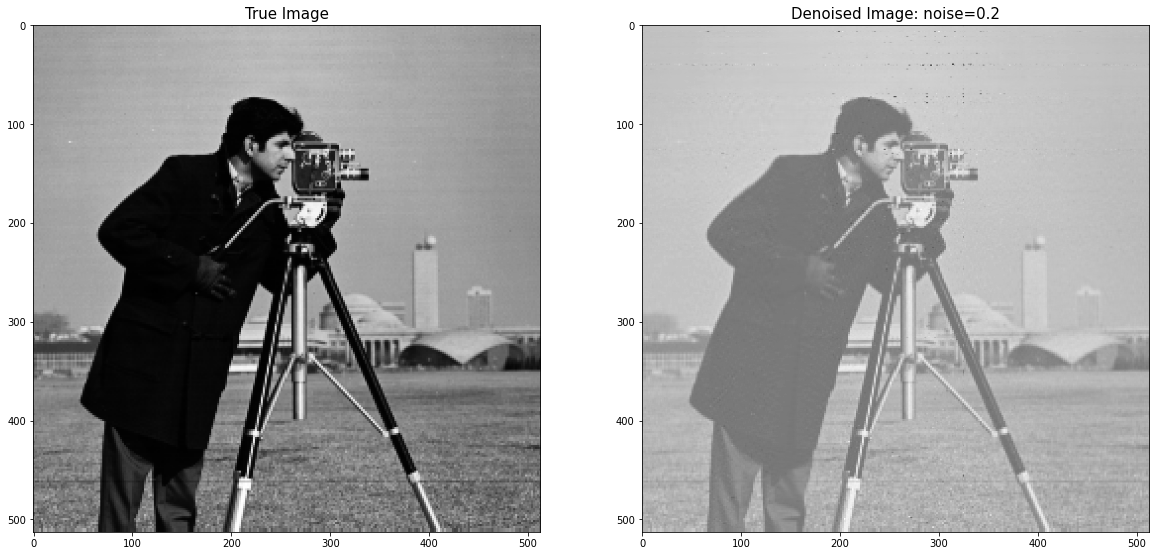

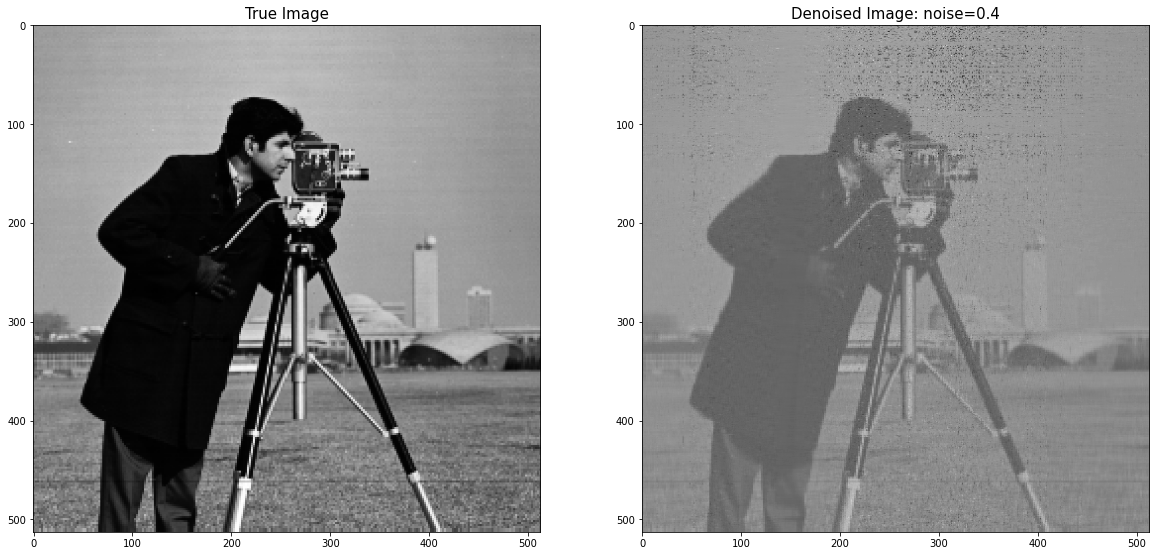

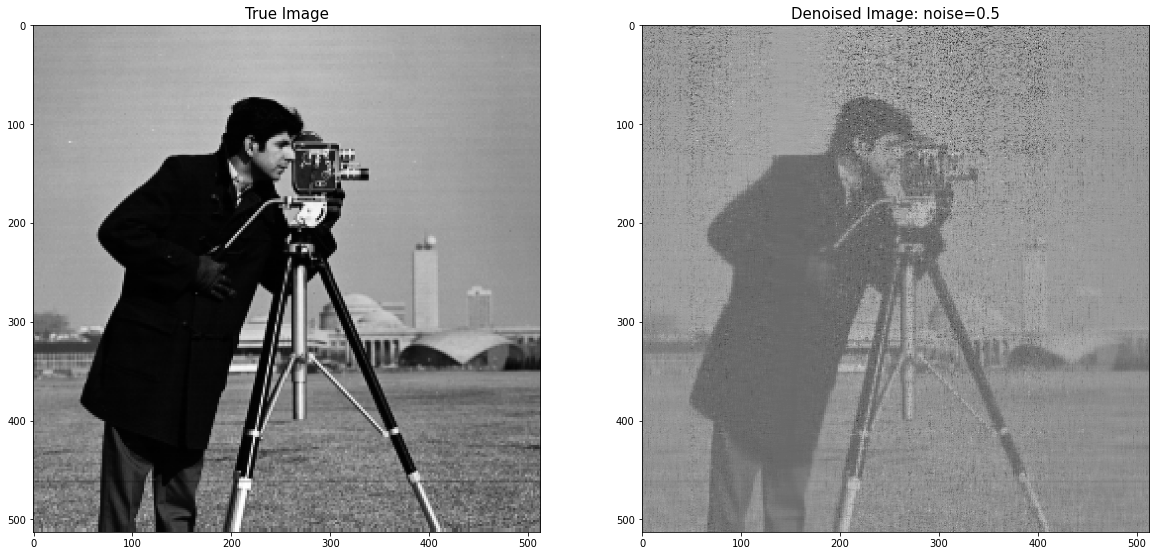

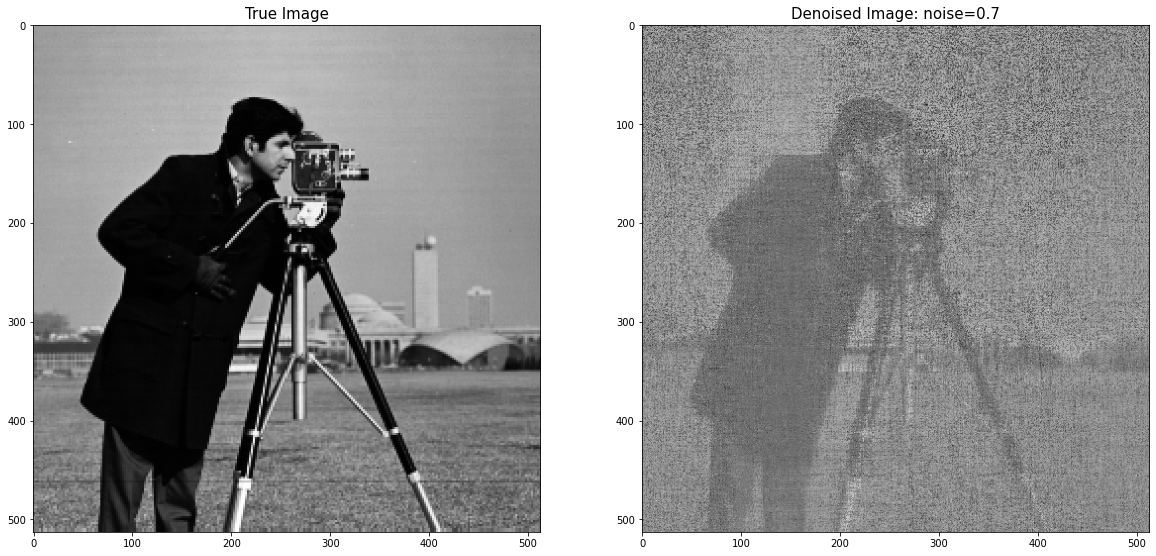

In [10]:
svd_k = [10, 50, 100]
svd_maxiter = 100 
svt_delta = [0.2, 0.5, 1.5, 1.7] #learning rate
e=0.0001 # stopping threshold
svt_maxiter=100

simm = []
noise_level = [0.1, 0.2, 0.4, 0.5, 0.7]

plt.figure(figsize=(20, 10))
for k in svd_k:
    simmd = []
    for d in svt_delta:
        simmn = []
        for i, nl in enumerate(noise_level):
            mask = gen_mask(m, n, nl)
            A = img*mask

            _, A_hat = svt_feature(A, svd_k=k, svt_delta=d)
            
            simmn.append(ssim(img,A_hat))
            
            print("SVT k {}, delta {}, noise level {}, RMSE:{:.3f} and SSIM: {:.3f}".format(k, d, nl, calc_unobserved_rmse(img, A_hat, mask), ssim(img,A_hat)))

            # Save noisy and denoised images
            if k==100 and d ==1.5:
                cv2.imwrite('results/svt/imgDenoised_' +str(nl)+'.jpg', A_hat)

                # Visualize results
                plot_proc(img, A_hat, 'Denoised Image: noise='+str(nl))

        simmd.append(simmn)
    simm.append(simmd)
